In [1]:
import numpy as np
import pandas as pd

Loading the Dataset

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


Analysising the data

In [4]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
data.shape

(404290, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


Checking for missing values

In [7]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

Since we have a lot of data we can delete 3 rows from the data containing null values

Deleting rows with null values

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

Checking for duplicate rows

In [10]:
data.duplicated().sum()

np.int64(0)

There are no rows with duplicate values

Seeing the distribution of Duplicate and non duplicate values

In [11]:
data['is_duplicate'].value_counts()

is_duplicate
0    255024
1    149263
Name: count, dtype: int64

The dataset is somewhat unbalanced

Checking for the count of unique questions and the questions appeared multiple times in dataset

In [12]:
qid=pd.Series(data['qid1'].tolist()+data['qid2'].tolist())
print("Number of Unique Questions: ",np.unique(qid).shape[0])
temp=qid.value_counts()>1
print("Number of Repeated Questions: ",temp[temp].shape[0])

Number of Unique Questions:  537929
Number of Repeated Questions:  111778


Therefore the number of unique questions are 537929
the number of repeated questions are 111778

Plotiing the graph to see the number of times the amount of questions getting repeated

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

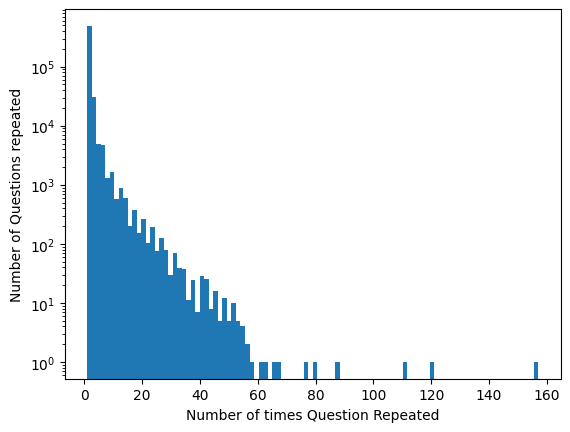

In [14]:
plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.xlabel("Number of times Question Repeated")
plt.ylabel("Number of Questions repeated")
plt.show()

It tells that more than 10^5 questions are repeated 0 times means they are unique
more than 10^4 questions are repeated 2 times and so on...

Since data is very large we will take 100000 rows from 

In [16]:
newdata=data.sample(100000,random_state=2)

In [17]:
newdata.head()

,id,qid1,qid2,question1,question2,is_duplicate
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1


Checking for the count of 1 and 0 in 100000 columns

In [18]:
newdata['is_duplicate'].value_counts()

is_duplicate
0    62996
1    37004
Name: count, dtype: int64

Feature Extraction

Adding 7 new features
q1len --> char length of q1
q2len --> char length of q2
q1words --> words in q1
q2words --> words in q2
words_common --> common words in both questions
words_total --> unique words in q1+unique words in q2
words_share --> words_common/words_total

Making 2 new columns q1len and q2len

In [19]:
newdata['q1len']=newdata['question1'].str.len()
newdata['q2len']=newdata['question2'].str.len()

In [20]:
newdata.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64


Making 2 new columns q1words and q2words

In [21]:
newdata['q1words']=newdata['question1'].apply(lambda row: len(row.split(" ")))
newdata['q2words']=newdata['question2'].apply(lambda row: len(row.split(" ")))

In [22]:
newdata.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1words,q2words
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12


Making new columns words_common

In [23]:
def common(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" "))) #finding unique words of question1
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" "))) # finding unique words of question2
    return len(w1 & w2) # calculating intersection for them and its length

In [24]:
newdata['words_common']=newdata.apply(common,axis=1)

In [25]:
newdata.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1words,q2words,words_common
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8


Making new column words_total

In [26]:
def total(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" "))) #finding unique words of question1
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" "))) # finding unique words of question2
    return len(w1)+len(w2) # calculating the total length of w1 and w2

In [27]:
newdata['words_total']=newdata.apply(total,axis=1)

In [28]:
newdata.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1words,q2words,words_common,words_total
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2,9
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5,25
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8,23


Making new column words_share

In [29]:
newdata['words_share']=round(newdata['words_common']/newdata['words_total'],2)

In [30]:
newdata.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1words,q2words,words_common,words_total,words_share
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13,0.15
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12,0.33
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2,9,0.22
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5,25,0.20
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8,23,0.35


Analysing the new features

<Axes: xlabel='q1len', ylabel='Count'>

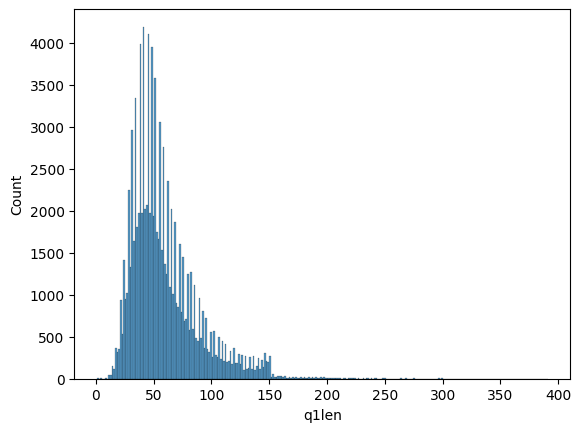

In [31]:
sns.histplot(newdata['q1len'])

<Axes: xlabel='q2len', ylabel='Count'>

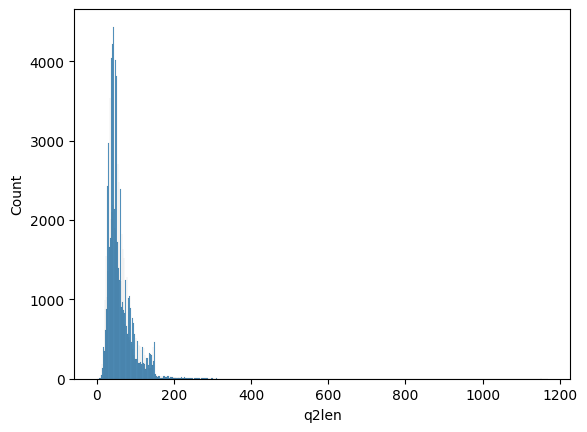

In [32]:
sns.histplot(newdata['q2len'])

<Axes: xlabel='q1words', ylabel='Count'>

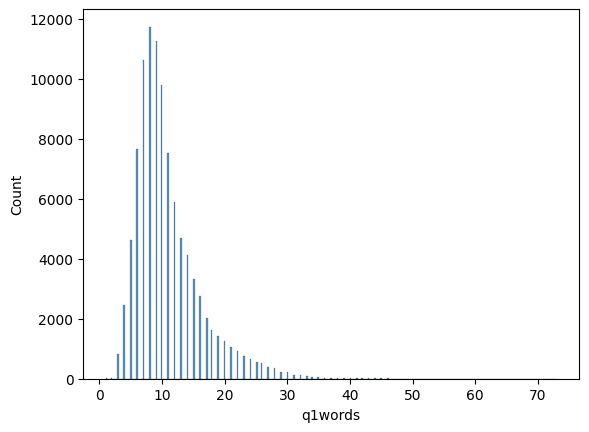

In [33]:
sns.histplot(newdata['q1words'])

<Axes: xlabel='q2words', ylabel='Count'>

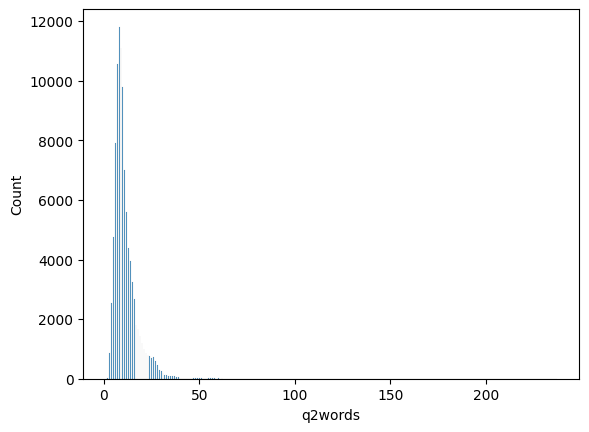

In [34]:
sns.histplot(newdata['q2words'])

<Axes: xlabel='words_common', ylabel='Count'>

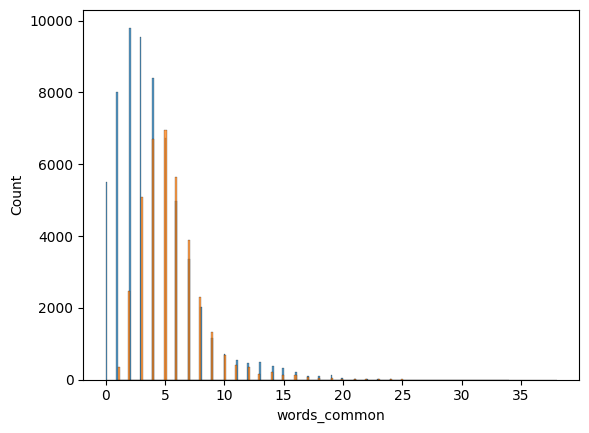

In [35]:
sns.histplot(newdata[newdata['is_duplicate']==0]['words_common'],label="Non Duplicate")
sns.histplot(newdata[newdata['is_duplicate']==1]['words_common'],label="Duplicate")

<Axes: xlabel='words_total', ylabel='Count'>

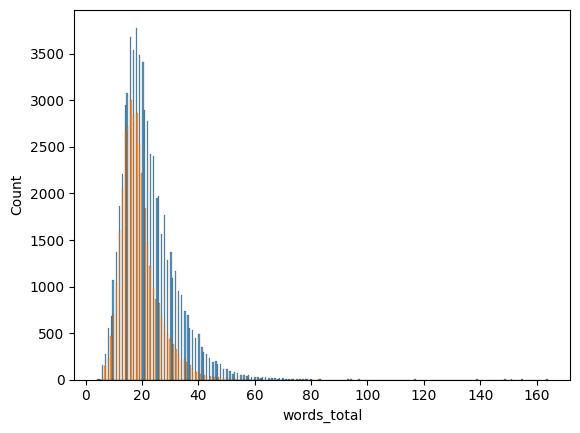

In [36]:
sns.histplot(newdata[newdata['is_duplicate']==0]['words_total'],label="Non Duplicate")
sns.histplot(newdata[newdata['is_duplicate']==1]['words_total'],label="Duplicate")

<Axes: xlabel='words_share', ylabel='Count'>

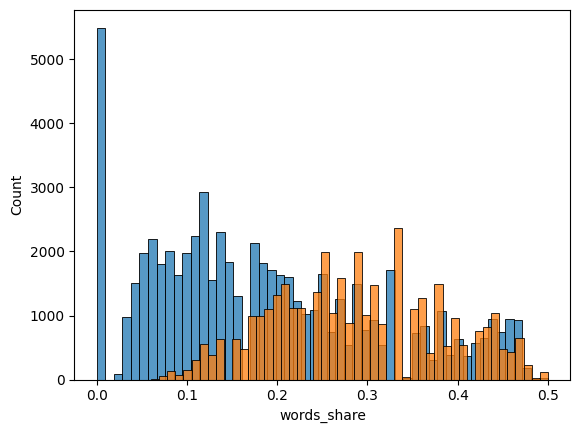

In [37]:
sns.histplot(newdata[newdata['is_duplicate']==0]['words_share'],label="Non Duplicate")
sns.histplot(newdata[newdata['is_duplicate']==1]['words_share'],label="Duplicate")

Data Preprocessing

In [38]:
import re
from bs4 import BeautifulSoup

In [39]:
def preprocess(q):
    #converting to lowercase
    q=str(q).lower().strip()

    #replacing special characters with their string equivalent
    q = q.replace('%',' percent')
    q = q.replace('$',' dollar ')
    q = q.replace('₹',' rupee ')
    q = q.replace('€',' euro ')
    q = q.replace('@',' at ')
    q=q.replace('[math]',' ')

    #replacing some numbers with their string equivalent
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    #Decontracting words
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    decontracted=[]
    for word in q.split():
        if word in contractions:
            word=contractions[word]

        decontracted.append(word)

    q = ' '.join(decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    #Removing HTML tags
    q = BeautifulSoup(q, 'html.parser')
    #q = BeautifulSoup(q)
    q = q.get_text()
    
    #Remove punctuations
    pattern = re.compile(r'\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q


Applying the preprocess method on data

In [40]:
newdata['question1']=newdata['question1'].apply(preprocess)
newdata['question2']=newdata['question2'].apply(preprocess)

C:\Users\Hp\AppData\Local\Temp\ipykernel_7788\2205253644.py:156: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q, 'html.parser')


In [41]:
newdata.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1words,q2words,words_common,words_total,words_share
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,26,44,5,8,2,13,0.15
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,34,44,5,7,4,12,0.33
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,21,38,3,6,2,9,0.22
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,45,73,10,16,5,25,0.20
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,59,64,11,12,8,23,0.35


Creating Advanced Features

1. Token Features
        cwc_min: This is the ratio of the number of common words to the length of the smaller question
        cwc_max: This is the ratio of the number of common words to the length of the larger question
        csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
        csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
        ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
        ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
        last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
        first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

In [42]:
from nltk.corpus import stopwords

In [43]:
def token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    safe= 0.0001 

    stop_words= stopwords.words("english")
    
    token_features = [0.0]*8  #creating a list with 8 0 as this method is going to give us 8 new features
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in stop_words])
    q2_words = set([word for word in q2_tokens if word not in stop_words])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in stop_words])
    q2_stops = set([word for word in q2_tokens if word in stop_words])
    
    #Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    #Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    #Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    #safe is added to all denominator as it may be possible that denominator becomes 0 so in order to avoid that safe(very small value) is added
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + safe)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + safe)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + safe)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + safe)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + safe)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + safe)
    
    #Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    #First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

Applying the token_feature to dataset

In [44]:
token_features = newdata.apply(token_features, axis=1)

newdata["cwc_min"]=list(map(lambda x: x[0], token_features))
newdata["cwc_max"]=list(map(lambda x: x[1], token_features))
newdata["csc_min"]=list(map(lambda x: x[2], token_features))
newdata["csc_max"]=list(map(lambda x: x[3], token_features))
newdata["ctc_min"]=list(map(lambda x: x[4], token_features))
newdata["ctc_max"]=list(map(lambda x: x[5], token_features))
newdata["last_word_eq"]=list(map(lambda x: x[6], token_features))
newdata["first_word_eq"]=list(map(lambda x: x[7], token_features))

In [45]:
newdata.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1words,q2words,...,words_total,words_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,26,44,5,8,...,13,0.15,0.999950,0.499988,0.000000,0.000000,0.399992,0.249997,1.0,0.0
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,34,44,5,7,...,12,0.33,0.666644,0.666644,0.999950,0.499988,0.799984,0.571420,1.0,0.0
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,21,38,3,6,...,9,0.22,0.000000,0.000000,0.999950,0.499988,0.666644,0.333328,0.0,1.0
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,45,73,10,16,...,25,0.20,0.666656,0.571420,0.499988,0.222220,0.545450,0.374998,0.0,0.0
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,59,64,11,12,...,23,0.35,0.999975,0.799984,0.666656,0.499994,0.727266,0.666661,1.0,0.0


2. Length Based Features
        mean_len: Mean of the length of the two questions (number of words)
        abs_len_diff: Absolute difference between the length of the two questions (number of words)
        longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question

Method to create Length Based Features

In [46]:
import distance

In [47]:
def length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    #Converting the Sentence into Tokens: 
    q1_tokens=q1.split()
    q2_tokens=q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features
    
    #Absolute length features
    length_features[0]=abs(len(q1_tokens)-len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1]=(len(q1_tokens)+len(q2_tokens))/2
    
    strs=list(distance.lcsubstrings(q1, q2))
    if strs:  # Check if strs is not empty
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0
    
    return length_features
    

Applying the method to extract length based features

In [48]:
length_features = newdata.apply(length_features,axis=1)

newdata['abs_len_diff']=list(map(lambda x: x[0], length_features))
newdata['mean_len']=list(map(lambda x: x[1], length_features))
newdata['longest_substr_ratio']=list(map(lambda x: x[2], length_features))

In [49]:
newdata.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1words,q2words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,26,44,5,8,...,0.499988,0.000000,0.000000,0.399992,0.249997,1.0,0.0,3.0,6.5,0.615385
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,34,44,5,7,...,0.666644,0.999950,0.499988,0.799984,0.571420,1.0,0.0,2.0,6.0,0.500000
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,21,38,3,6,...,0.000000,0.999950,0.499988,0.666644,0.333328,0.0,1.0,3.0,4.5,0.476190
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,45,73,10,16,...,0.571420,0.499988,0.222220,0.545450,0.374998,0.0,0.0,5.0,13.5,0.244444
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,59,64,11,12,...,0.799984,0.666656,0.499994,0.727266,0.666661,1.0,0.0,1.0,11.5,0.355932


3.  Fuzzy Features
        fuzz_ratio: fuzz_ratio score from fuzzywuzzy
        fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
        token_sort_ratio: token_sort_ratio from fuzzywuzzy
        token_set_ratio: token_set_ratio from fuzzywuzzy

Making a function to extract Fuzzy features

In [50]:
from fuzzywuzzy import fuzz

C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [51]:
def fuzzy_features(row):
    
    q1=row['question1']
    q2=row['question2']
    
    fuzzy_features=[0.0]*4 #creating a list with 4 0 in it
    
    # fuzz_ratio
    fuzzy_features[0]=fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1]=fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2]=fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3]=fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

Applying the function to dataset

In [52]:
fuzzy_features = newdata.apply(fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
newdata['fuzz_ratio']=list(map(lambda x: x[0], fuzzy_features))
newdata['fuzz_partial_ratio']= list(map(lambda x: x[1], fuzzy_features))
newdata['token_sort_ratio']=list(map(lambda x: x[2], fuzzy_features))
newdata['token_set_ratio']=list(map(lambda x: x[3], fuzzy_features))

In [53]:
newdata.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1words,q2words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,26,44,5,8,...,0.249997,1.0,0.0,3.0,6.5,0.615385,59,68,50,75
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,34,44,5,7,...,0.571420,1.0,0.0,2.0,6.0,0.500000,71,82,63,84
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,21,38,3,6,...,0.333328,0.0,1.0,3.0,4.5,0.476190,67,85,60,60
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,45,73,10,16,...,0.374998,0.0,0.0,5.0,13.5,0.244444,45,55,61,76
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,59,64,11,12,...,0.666661,1.0,0.0,1.0,11.5,0.355932,81,81,78,86


Doing Data Analysis on the newly created columns

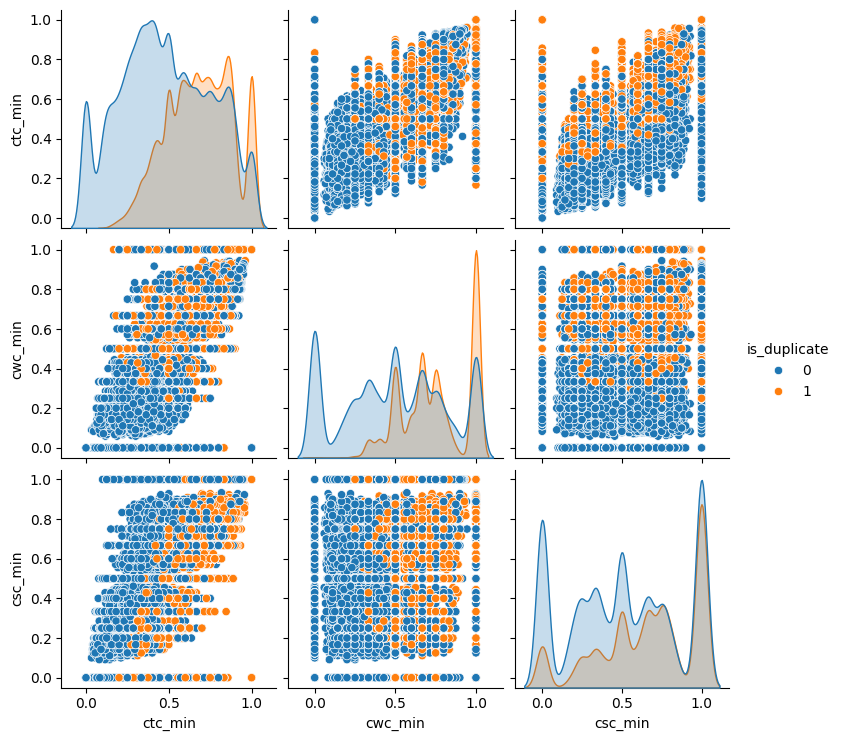

In [54]:
sns.pairplot(newdata[['ctc_min','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

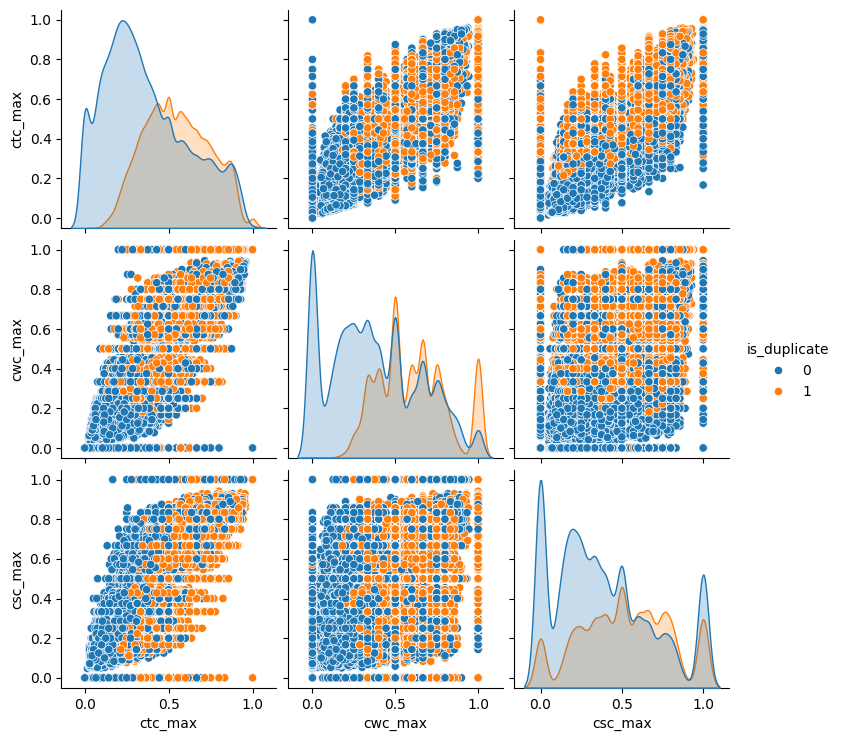

In [55]:
sns.pairplot(newdata[['ctc_max','cwc_max','csc_max','is_duplicate']],hue='is_duplicate')

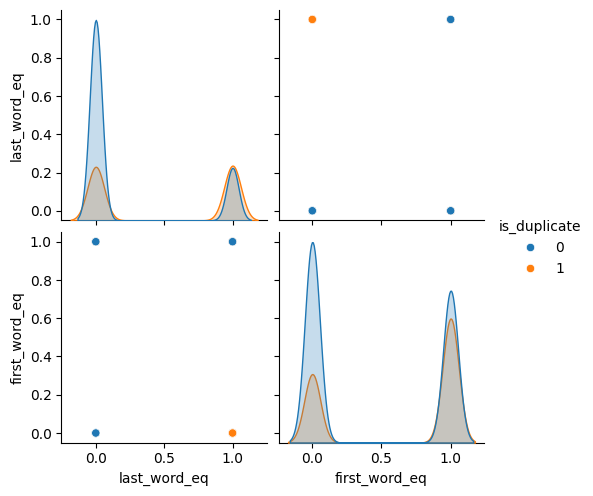

In [56]:
sns.pairplot(newdata[['last_word_eq','first_word_eq','is_duplicate']],hue='is_duplicate')

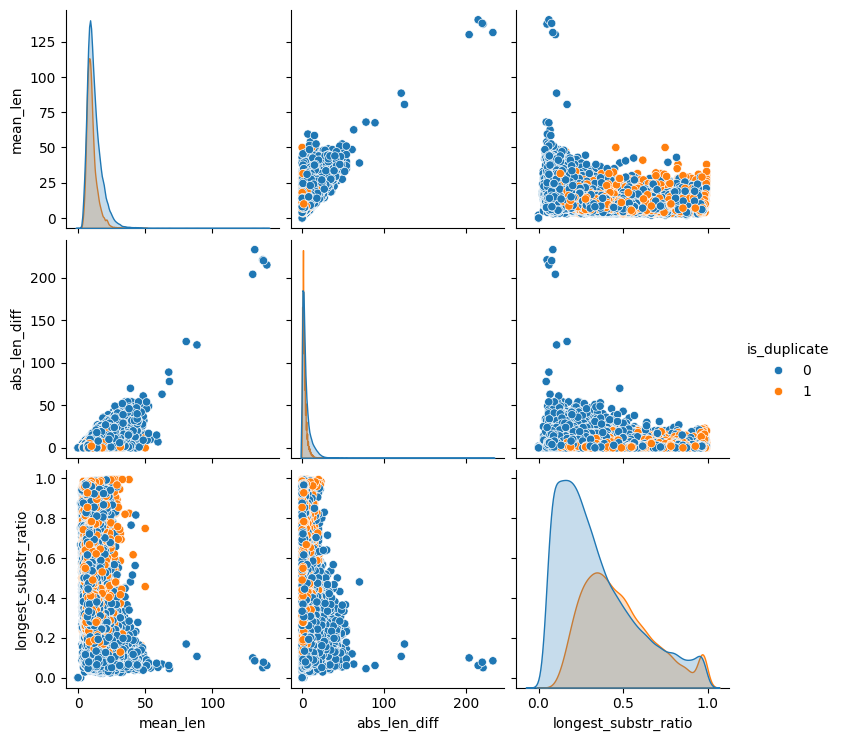

In [57]:
sns.pairplot(newdata[['mean_len','abs_len_diff','longest_substr_ratio','is_duplicate']],hue='is_duplicate')

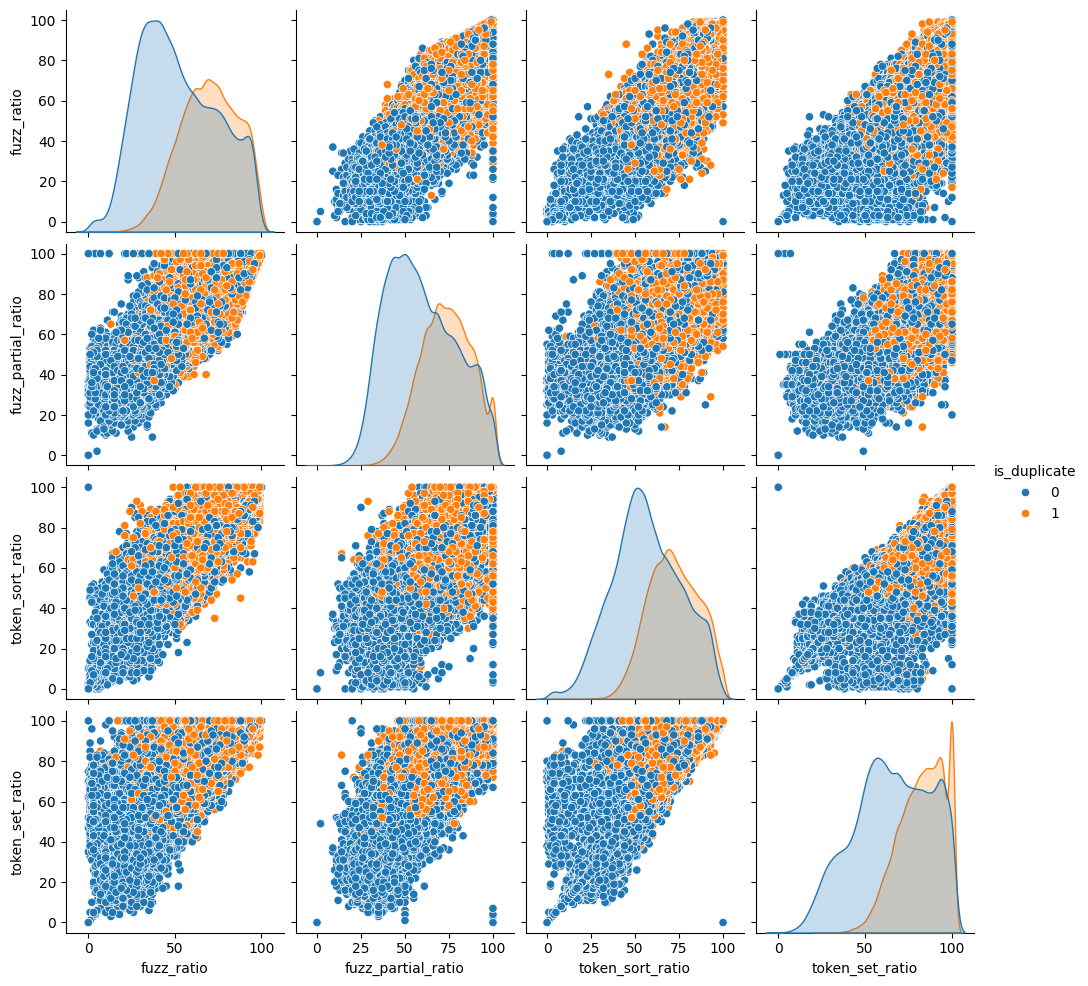

In [58]:
sns.pairplot(newdata[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']],hue='is_duplicate')

This analysis tells that the newly created features are somewhat important for determing the output

Applying CountVectorizer on both questions i.e. converting questions into vectors

For doing the above extracting the questions columns

In [59]:
quedata= newdata[['question1','question2']]
quedata.head()

,question1,question2
331535,how can i learn norwegian,what is the quickest way to learn norwegian
45407,how are currency rates determined,where and how are exchange rates determined
286200,what is substitution,what is a substitute for caciocavallo
157195,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...
154346,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...


In [60]:
finaldata= newdata.drop(columns=['id','qid1','qid2','question1','question2'])
print(finaldata.shape)
finaldata.head()

(100000, 23)


,is_duplicate,q1len,q2len,q1words,q2words,words_common,words_total,words_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
331535,1,26,44,5,8,2,13,0.15,0.999950,0.499988,...,0.249997,1.0,0.0,3.0,6.5,0.615385,59,68,50,75
45407,1,34,44,5,7,4,12,0.33,0.666644,0.666644,...,0.571420,1.0,0.0,2.0,6.0,0.500000,71,82,63,84
286200,0,21,38,3,6,2,9,0.22,0.000000,0.000000,...,0.333328,0.0,1.0,3.0,4.5,0.476190,67,85,60,60
157195,1,45,73,10,16,5,25,0.20,0.666656,0.571420,...,0.374998,0.0,0.0,5.0,13.5,0.244444,45,55,61,76
154346,1,59,64,11,12,8,23,0.35,0.999975,0.799984,...,0.666661,1.0,0.0,1.0,11.5,0.355932,81,81,78,86


Converting questions to 3000 vectors

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(quedata['question1']) + list(quedata['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [62]:
temp1 = pd.DataFrame(q1_arr, index= quedata.index)
temp2= pd.DataFrame(q2_arr, index= quedata.index)
temp= pd.concat([temp1, temp2], axis=1)
temp.shape

(100000, 6000)

Made a new dataset that contains all the newly created 23 feautres + 6000 vectors for both questions

In [63]:
finaldata=pd.concat([finaldata,temp], axis=1)

In [64]:
finaldata.shape

(100000, 6023)

In [65]:
finaldata.head()

,is_duplicate,q1len,q2len,q1words,q2words,words_common,words_total,words_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
331535,1,26,44,5,8,2,13,0.15,0.999950,0.499988,...,0,0,0,0,0,0,0,0,0,0
45407,1,34,44,5,7,4,12,0.33,0.666644,0.666644,...,0,0,0,0,0,0,0,0,0,0
286200,0,21,38,3,6,2,9,0.22,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
157195,1,45,73,10,16,5,25,0.20,0.666656,0.571420,...,0,0,0,0,0,0,0,0,0,0
154346,1,59,64,11,12,8,23,0.35,0.999975,0.799984,...,0,0,0,0,0,0,0,0,0,0


Applying RandomForest and XGBoost Algorithms

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(finaldata.iloc[:,1:].values,finaldata.iloc[:,0].values,test_size=0.2,random_state=1)

Applying Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [69]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)

In [70]:
accuracy_score(Y_test,Y_pred)

0.8082

In [71]:
confusion_matrix(Y_test,Y_pred)

array([[10711,  1873],
       [ 1963,  5453]])

Applying XGBoost Algorithm

In [72]:
from xgboost import XGBClassifier

In [73]:
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
Y_pred1 = xgb.predict(X_test)

In [74]:
accuracy_score(Y_test,Y_pred1)

0.8043

In [75]:
confusion_matrix(Y_test,Y_pred1)

array([[10535,  2049],
       [ 1865,  5551]])

In confusion metric best will be the one with less number at 0,2 position and RandomForest value at 0,1 is less than at XGBoost, Also more accuracy is from RandomForest

We will select RandomForest Algorithm